## Analyzing Boston Marathon Atheletes

The dataset used is 2014




In [ ]:
import numpy as np
import pandas as pd
import scipy
import math
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering

In [40]:
# utility functions
def convert_gender_to_numeric(x):
    map = {'M' : 0, 'F' : 1}
    try:
        return int(map[x])
    except:
        return Decimal('nan')

In [41]:
def convert_bib_to_numeric(x):
    map = {'F':4, 'W':5}
    test_dig = str(x[:1])
    if test_dig.isnumeric():
#       doing nothing
        return int(x)
    elif test_dig == 'F':
        return (map[test_dig]*10000 + int(str(x[1:])))
    elif test_dig == 'W':
        return (map[test_dig]*10000 + int(str(x[1:])))
    else:
        return Decimal('nan')

In [42]:
def convert_country_to_numeric(x):
    map = {'ARG':1, 'AUS':2, 'AUT':3, 'BAH':4, 'BAR':5, 
           'BEL':6, 'BER':7, 'BLR':8, 'BOL':9, 'BRA':10, 
           'BRN':11, 'CAN':12, 'CAY':13, 'CHI':14, 'CHN':15, 
           'COL':16, 'CRC':17, 'CRO':18, 'CZE':19, 'DEN':20,  
           'DOM':21, 'ECU':22, 'EGY':23, 'ESA':24, 'ESP':25, 
           'EST':26, 'ETH':27, 'FIN':28, 'FRA':29, 'GBR':30, 
           'GER':31, 'GRE':32, 'GUA':33, 'HKG':34, 'HUN':35, 
           'INA':36, 'IND':37, 'IRL':38, 'ISL':39, 'ISR':40, 
           'ITA':41, 'JPN':42, 'KEN':43, 'KOR':44, 'LIE':45, 
           'LUX':46, 'MAR':47, 'MAS':48, 'MEX':49, 'NED':50,  
           'NOR':51, 'NZL':52, 'PAN':53, 'PER':54, 'PHI':55, 
           'POL':56, 'POR':57, 'QAT':58, 'ROU':59, 'RSA':60, 
           'RUS':61, 'SIN':62, 'SLO':63, 'SUI':64, 'SVK':65, 
           'SWE':66, 'TAN':67, 'THA':68, 'TPE':69, 'TRI':70, 
           'TUR':71, 'UAE':72, 'UKR':73, 'URU':74, 'USA':75, 
           'VEN':76, 'VGB':77, 'ZIM':78}
    try:
        return int(map[x])
    except KeyError:
        return Decimal('nan')

In [43]:
def remove_char_at_end(x, c):
    y = str(x).rstrip()
    print('value {}'.format(y))
    return float(y)

In [44]:
df = pd.read_csv('../data-201-resources-master/boston-marathon_test.csv')
df.head()

,10k,id,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,40k
0,17.37,1,8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,80.43
1,32.58,2,1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,132.10
2,16.62,3,1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,76.10
3,32.57,4,3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,132.95
4,17.12,5,2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,76.72


In [45]:
# remove columns of ctz & state, since their values are most NaN
df.drop(['ctz'], axis=1, inplace=True)
df.drop(['state'], axis=1, inplace=True)

df = df.dropna()

In [46]:
# remove end_of_line special char
df['40k-a'] = df['40k'].apply(lambda x: str(x).rstrip())

# convert to numeric values
df['gender'] = df['gender'].apply(lambda x: convert_gender_to_numeric(x))
df['bib'] = df['bib'].apply(lambda x: convert_bib_to_numeric(x))
df['country'] = df['country'].apply(lambda x: convert_country_to_numeric(x))

In [50]:
X = pd.DataFrame()
X = df.copy()
X.drop(['id'], axis=1, inplace=True)
X.drop(['division'], axis=1, inplace=True)
X.drop(['bib'], axis=1, inplace=True)
X.drop(['genderdiv'], axis=1, inplace=True)
#X.drop(['overall'], axis=1, inplace=True)
X.drop(['pace'], axis=1, inplace=True)
#X.drop(['country'], axis=1, inplace=True
# delete newline '\n' char
X.drop(['40k'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


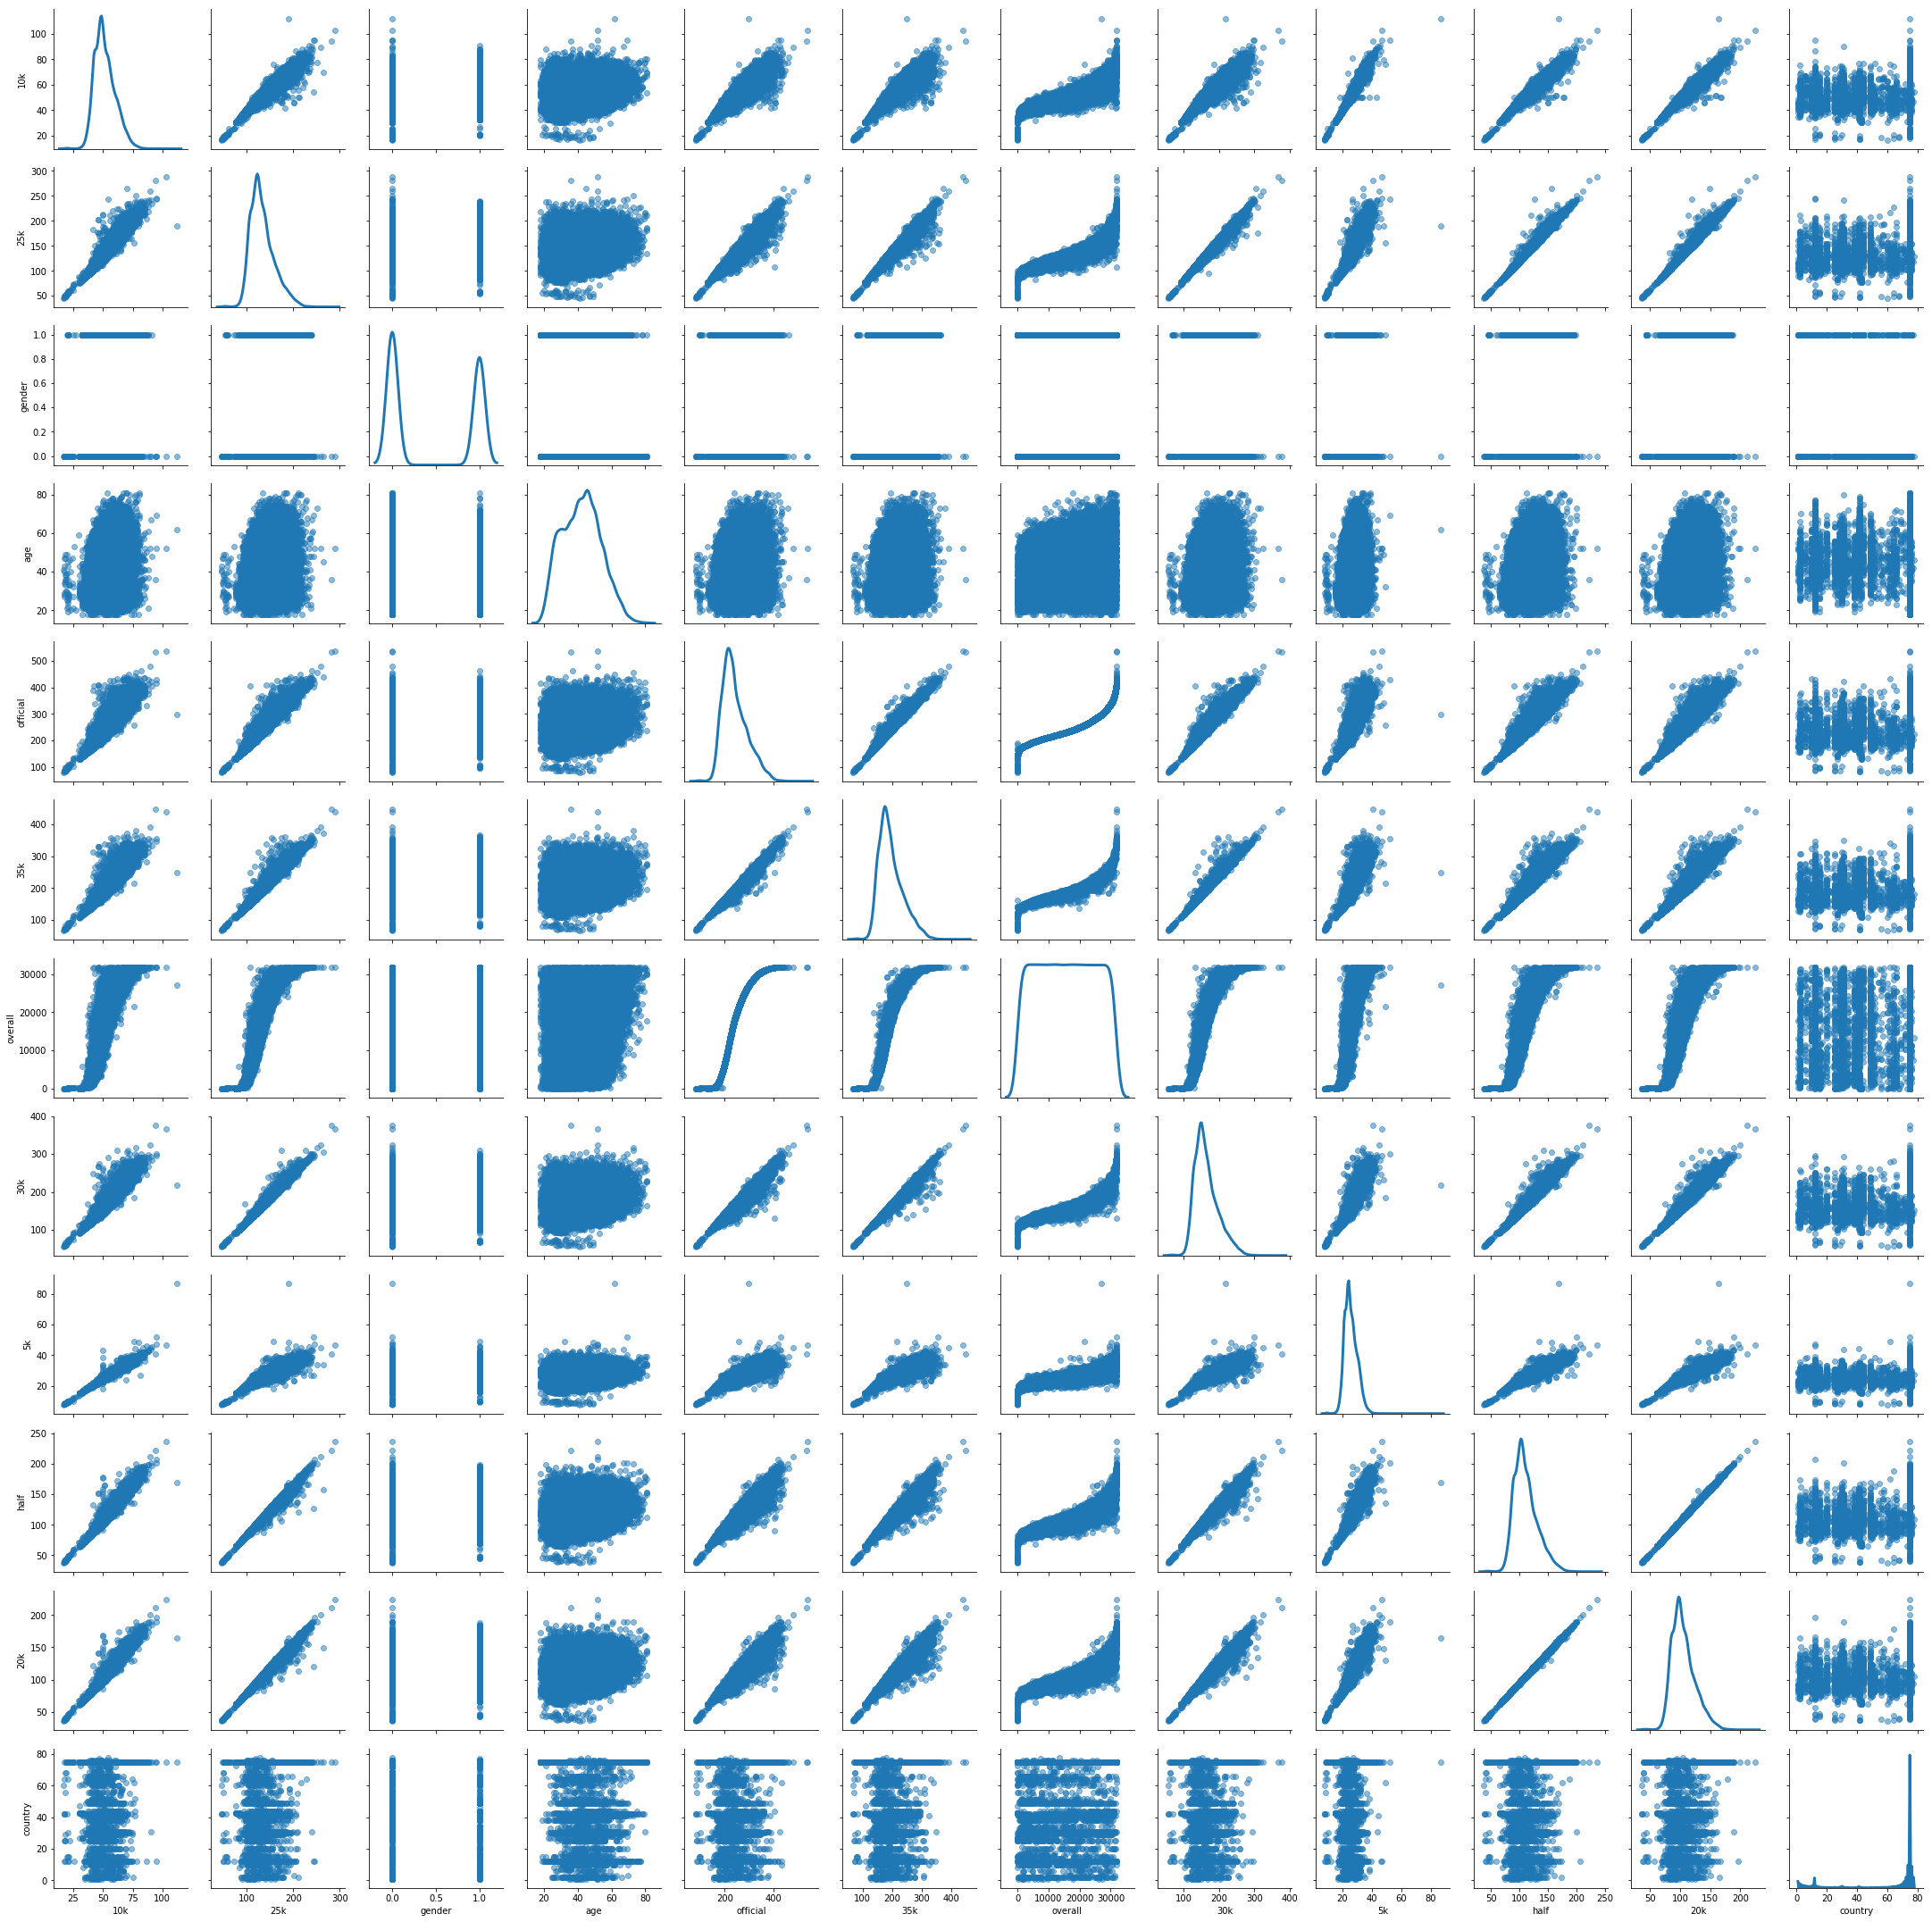

In [58]:
# visualizing data
# making scatter plots
graph = sns.PairGrid(X, diag_sharey=False)
# lower left scatter plots
graph.map_lower(plt.scatter, alpha=0.5)
# upper right linear regression fit plots
graph.map_upper(plt.scatter, alpha=0.5)
# diagonal variables' univariate distributions
graph.map_diag(sns.kdeplot, lw=3)
plt.show()

In [51]:
# breaking data into train & test sets
X_train, X_test = train_test_split(X, test_size=0.9, random_state=45)

In [52]:
# First use MeanShift model to estimate number of clusters
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# cluster assignment labels
labels = ms.labels_
# cluster centers
cluster_centers_ = ms.cluster_centers_

n_cluster = len(np.unique(labels))
print('Number of estimated clusters: {}'.format(n_cluster))


Number of estimated clusters: 4


In [ ]:
# Second use K-Means model to perform clustering
# normalize data
X_norm = normalize(X_train)
X_pca = PCA(4).fit_transform(X_norm)

n_cluster = 4
y_pred = KMeans(n_clusters=n_cluster, random_state=51).fit_predict(X_pca)

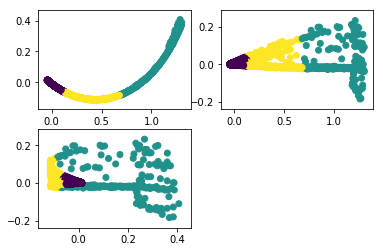

In [56]:
fig = plt.figure()
fig.add_subplot(221)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
fig.add_subplot(222)
plt.scatter(X_pca[:,0], X_pca[:,2], c=y_pred)
fig.add_subplot(223)
plt.scatter(X_pca[:,1], X_pca[:,2], c=y_pred)
plt.show()

In [57]:
#print('Comparing the assigned categories to the ones in the data:')
#print(pd.crosstab(y_train,labels))
